C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


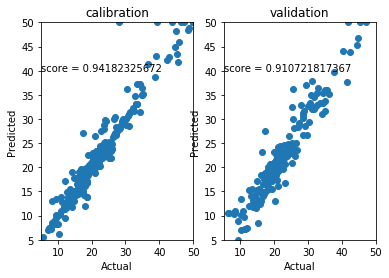

In [1]:
# 今さら新しみのないサポートベクターマシン(SVM)のサンプルコード（Python,Scikit-learn）
# http://russeng.hatenablog.jp/entry/2016/03/11/075331

# -*- coding: utf-8 -*-
#import numpy
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing


# Bostonデータの読み込み
boston = datasets.load_boston()
X = boston.data
Y = boston.target

# データの6割をキャリブレーション用(校正曲線作成用)、4割をバリデーション用（校正曲線検証用）とする
# ※cross_validationというモジュールを使っているが、データのランダムな分割に使っているだけ。
X_cali, X_vali, Y_cali, Y_vali = cross_validation.train_test_split(X, Y, test_size=0.4)

# 説明変数の標準化
scaler = preprocessing.StandardScaler().fit(X_cali)
X_cali = scaler.transform(X_cali)
X_vali = scaler.transform(X_vali)

# 交差検定により、適切なパラメータを探索させる（グリッドサーチ）
# デフォルト：γ∈2^-15~2^3 (-15,4) C∈2^-5~2^15(-5,16) (出典有り)


# カーネルにRBFを適用
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [2**i for i in range(-15,4)], 'C': [2**i for i in range(-5,16)]}]
gscv = GridSearchCV(svm.SVR(), tuned_parameters, cv=10,)
gscv.fit(X_cali, Y_cali)

reg_max = gscv.best_estimator_ #交差検定の結果、もっとも成績のよい判別器

# キャリブレーション結果の出力
plt.subplot(1,2,1)
plt.scatter(reg_max.predict(X_cali), Y_cali)
plt.title("calibration")
ymax = max(Y)
ymin = min(Y)
plt.xlim(ymin, ymax)
plt.ylim(ymin, ymax)
plt.xlabel('Actual') # x軸のラベル
plt.ylabel('Predicted') # y軸のラベル
scocali = "score = " + str(reg_max.score(X_cali, Y_cali))
plt.text(ymin,ymax*0.8, scocali)#位置は適当なので状況に応じて直すべき

# バリデーション結果の出力
plt.subplot(1,2,2)
plt.scatter(reg_max.predict(X_vali), Y_vali)
plt.title("validation")
plt.xlim(ymin, ymax)
plt.ylim(ymin, ymax)
plt.xlabel('Actual') 
plt.ylabel('Predicted') 
scovali = "score = " + str(reg_max.score(X_vali, Y_vali))
plt.text(ymin,ymax*0.8, scovali)
plt.show()